In [1]:
import os
import sys
sys.path.append("../..")
import phage_init

In [2]:
#load the saved matrices
import pickle
train_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"train_x_data2_full.p"), "rb" ) )
test_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"test_x_data2_full.p"), "rb" ) )
train_Y=pickle.load(open( os.path.join(phage_init.data_dir,"train_y_data2_full.p"), "rb" ) )
test_Y=pickle.load(open( os.path.join(phage_init.data_dir,"test_y_data2_full.p"), "rb" ) )
mean_total=pickle.load(open( os.path.join(phage_init.data_dir,"mean_data2_full.p"), "rb" ) )
std_total=pickle.load(open( os.path.join(phage_init.data_dir,"std_data2_full.p"), "rb" ) )

In [3]:
di_train     = train_X_total[:,0:400]
tri_train    = train_X_total[:,400:8400]
di_sc_train  = train_X_total[:,8400:8449] 
tri_sc_train = train_X_total[:,8449:8792]
tt_train     = train_X_total[:,8792:]

In [4]:
di_test     = test_X_total[:,0:400]
tri_test    = test_X_total[:,400:8400]
di_sc_test  = test_X_total[:,8400:8449] 
tri_sc_test = test_X_total[:,8449:8792]
tt_test     = test_X_total[:,8792:]

In [5]:
mean_di     = mean_total[0:400]
mean_tri    = mean_total[400:8400]
mean_di_sc  = mean_total[8400:8449] 
mean_tri_sc = mean_total[8449:8792]
mean_tt     = mean_total[8792:]

In [6]:
std_di     = std_total[0:400]
std_tri    = std_total[400:8400]
std_di_sc  = std_total[8400:8449] 
std_tri_sc = std_total[8449:8792]
std_tt     = std_total[8792:]

In [7]:
#import keras and numpy
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import Adam

Using TensorFlow backend.


In [8]:
#print(di_train.shape)
print(tt_train.shape)
#train_X =numpy.concatenate((tri_sc_train,tt_train),axis=1)
#test_X  =numpy.concatenate((tri_sc_test,tt_test),axis=1)
train_X=tri_train
test_X=tri_test
model_name='tri_data2.h5'
print(train_X.shape)
print(test_X.shape)

(50000, 8)
(50000, 8000)
(7774, 8000)


In [9]:
#this list the devices, just making sure there is a GPU present, you might be fine with no GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18255882411441174237
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 848179054679042692
physical_device_desc: "device: XLA_CPU device"
]


In [10]:
print(train_X.shape[1])
f_num=train_X.shape[1]


8000


In [11]:
#model with 2 leyers of 100 LSTM neurons
model = Sequential()
opt=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.add(Dense(f_num, input_dim=f_num, kernel_initializer='random_uniform',activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(200,activation='relu'))
#model.add(Dense(200,activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8000)              64008000  
_________________________________________________________________
dropout_1 (Dropout)          (None, 8000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               1600200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2010      
Total para

In [12]:
model.fit(train_X, train_Y, epochs=200,verbose=1, batch_size=2000)

Epoch 1/200
50000/50000 [==============================] - 59s 1ms/step - loss: 2.5992 - acc: 0.5570
Epoch 2/200
50000/50000 [==============================] - 56s 1ms/step - loss: 0.4885 - acc: 0.8552
Epoch 3/200
50000/50000 [==============================] - 56s 1ms/step - loss: 0.2352 - acc: 0.9304
Epoch 4/200
50000/50000 [==============================] - 56s 1ms/step - loss: 0.1427 - acc: 0.9580
Epoch 5/200
50000/50000 [==============================] - 56s 1ms/step - loss: 0.0969 - acc: 0.9709
Epoch 6/200
50000/50000 [==============================] - 56s 1ms/step - loss: 0.0766 - acc: 0.9779
Epoch 7/200
50000/50000 [==============================] - 57s 1ms/step - loss: 0.0662 - acc: 0.9800
Epoch 8/200
50000/50000 [==============================] - 56s 1ms/step - loss: 0.0568 - acc: 0.9844
Epoch 9/200
50000/50000 [==============================] - 57s 1ms/step - loss: 0.0497 - acc: 0.9858
Epoch 10/200
50000/50000 [==============================] - 56s 1ms/step - loss: 0.0456 - a

50000/50000 [==============================] - 65s 1ms/step - loss: 0.0213 - acc: 0.9946
Epoch 84/200
50000/50000 [==============================] - 65s 1ms/step - loss: 0.0199 - acc: 0.9949
Epoch 85/200
50000/50000 [==============================] - 64s 1ms/step - loss: 0.0197 - acc: 0.9951
Epoch 86/200
50000/50000 [==============================] - 65s 1ms/step - loss: 0.0189 - acc: 0.9955
Epoch 87/200
50000/50000 [==============================] - 64s 1ms/step - loss: 0.0180 - acc: 0.9958
Epoch 88/200
50000/50000 [==============================] - 65s 1ms/step - loss: 0.0211 - acc: 0.9946
Epoch 89/200
50000/50000 [==============================] - 65s 1ms/step - loss: 0.0198 - acc: 0.9951
Epoch 90/200
50000/50000 [==============================] - 64s 1ms/step - loss: 0.0193 - acc: 0.9952
Epoch 91/200
50000/50000 [==============================] - 65s 1ms/step - loss: 0.0205 - acc: 0.9949
Epoch 92/200
50000/50000 [==============================] - 65s 1ms/step - loss: 0.0199 - acc: 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
scores = model.evaluate(test_X, test_Y, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

7774/7774 [==============================] - 9s 1ms/step
Accuracy: 90.84%


In [20]:
#you can save the as a file so you dont have to train it every time
model.save( os.path.join(phage_init.model_dir,model_name))

In [15]:
from sklearn.metrics import classification_report


test_Y_index = test_Y.argmax(axis=1) # Convert one-hot to index
test_Y_predicted = model.predict_classes(test_X)
labels_names=["Major capsid","Minor capsid","Baseplate","Major tail","Minor tail","Portal","Tail fiber",
             "Tail shaft","Collar","Head-Tail joining"]
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
#print (test_Y_index)

                   precision    recall  f1-score   support

     Major capsid       0.95      0.94      0.94      1836
     Minor capsid       0.73      0.55      0.63       105
        Baseplate       0.91      0.88      0.89       308
       Major tail       0.92      0.87      0.90       423
       Minor tail       0.82      0.81      0.81       499
           Portal       0.94      0.95      0.95      2473
       Tail fiber       0.78      0.74      0.76       412
       Tail shaft       0.89      0.95      0.92       677
           Collar       0.72      0.80      0.76       149
Head-Tail joining       0.90      0.92      0.91       892

        micro avg       0.91      0.91      0.91      7774
        macro avg       0.86      0.84      0.85      7774
     weighted avg       0.91      0.91      0.91      7774



In [16]:
from collections import Counter
zz=Counter(test_Y_index)
sample_w=[zz[i] for i in range(0,10,1)]
print(zz)
print(sample_w)
print()

Counter({5: 2473, 0: 1836, 9: 892, 7: 677, 4: 499, 3: 423, 6: 412, 2: 308, 8: 149, 1: 105})
[1836, 105, 308, 423, 499, 2473, 412, 677, 149, 892]



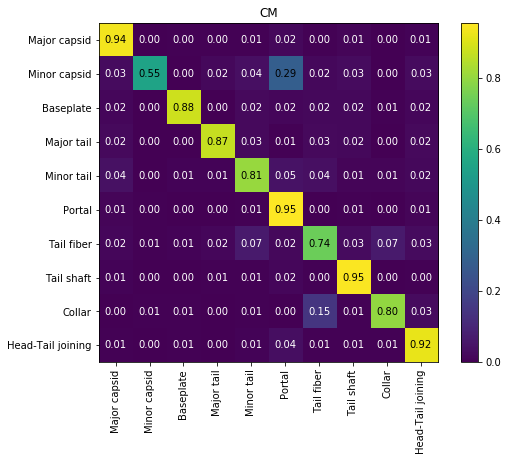

In [21]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

CM=confusion_matrix(test_Y_index, test_Y_predicted)
CM_n=CM/numpy.array(sample_w)[:,None]
scale_up=1.3
plt.figure(figsize=[6.4*scale_up, 4.8*scale_up])
plt.imshow(CM_n, interpolation='nearest')
plt.title('CM')
plt.colorbar()
tick_marks = numpy.arange(len(labels_names))
plt.xticks(tick_marks, labels_names, rotation=90)
plt.yticks(tick_marks, labels_names)
fmt = '.2f'
for i, j in itertools.product(range(CM_n.shape[0]), range(CM_n.shape[1])):
        plt.text(j, i, format(CM_n[i, j], fmt),horizontalalignment="center",verticalalignment='center',
                color="white" if CM_n[i, j] < 0.25 else "black")
plt.show()

In [18]:
plt.show()